# Analisis de resultados del WebScraping.

### Librerias:

In [115]:
import os
import Keys
import openai
import folium
import unidecode
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
from geopy.geocoders import GoogleV3

### Carga de archivos

Se cargan los dataframes diferentes y se unen para visualizar su contenido, realizar modificaciones necesarias y proceder a agruparlos una vez validemos que estan bien sus datos y estructura.

In [116]:
df_Categorias = pd.read_csv("./categorias.csv") # Se cargan el dataframe con las categorias establecidas.

In [117]:
# Directorio que contiene los archivos CSV
directorio = './Resultados'

#Se excluirá el df_final
archivo_excluido = "df_final.csv"

# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Itera a través de los archivos en el directorio
for filename in os.listdir(directorio):
    if filename.endswith(".csv") and filename != archivo_excluido:
        # Lee el archivo CSV y conviértelo en un DataFrame
        path = os.path.join(directorio, filename)
        df = pd.read_csv(path)
        dataframes.append(df)

# Combina los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)

### Visualizar archivos

visualizamos su contenido y estructura para conocer más de cerca cada uno de los archivos

In [118]:
df

,Title,Location,Company
0,Aprendiz Universitario en Ingeniería de Softwa...,Colombia,Bancolombia
1,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia
2,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia
3,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia
4,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia
...,...,...,...
1320,Jefe de TI,"La Estrella, Antioquia, Colombia",Milagros Enterprise Group S.A.S
1321,Analista seguridad TI (monitoreo),"Medellin, Antioquia, Colombia",POSTOBON S.A.
1322,Analista contable,"Bogota, D.C., Capital District, Colombia",Tecnología Informática
1323,Docente de Redes e Informática,"Bogota, D.C., Capital District, Colombia",Educación Futuro


### Duplicados

In [119]:
df.drop_duplicates()

,Title,Location,Company
0,Aprendiz Universitario en Ingeniería de Softwa...,Colombia,Bancolombia
1,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia
2,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia
3,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia
4,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia
...,...,...,...
1270,Jefe de tecnología experiencia en transformaci...,"Candelaria, Valle del Cauca, Colombia",Soluciones Inmediatas S.A.S
1308,Auxiliar de soporte técnico,"Medellín, Antioquia, Colombia",E-Global S.A.
1317,Ingeniero de Ciberseguridad - Colombia,Colombia,BBVA en Colombia
1320,Jefe de TI,"La Estrella, Antioquia, Colombia",Milagros Enterprise Group S.A.S


### Nulos

Validamos si poseen datos nulos en cada uno de los dataframe

In [120]:
df.isnull().sum()

Title       0
Location    0
Company     0
dtype: int64

### Transformaciones:

In [121]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x) # Se pasa todo el df a minuscula
df_Categorias = df_Categorias.applymap(lambda x: x.lower() if isinstance(x, str) else x) # Se pasa todo el df a minuscula

In [122]:
# Definimos una función para aplicar unidecode a una celda
def quitar_acentos(celda):
    if isinstance(celda, str):
        return unidecode(celda)
    else:
        return celda

In [123]:
# Se aplica unidecode para eliminar acentos y caracteres especiales
df = df.applymap(quitar_acentos)
df_Categorias = df_Categorias.applymap(quitar_acentos)

- Agrupar por titulos

In [124]:
df_por_ubicación = df.groupby('Location')['Title'].nunique().reset_index()

In [125]:
print(df_por_ubicación)

                                          Location  Title
0                              antioquia, colombia      1
1                     barbosa, antioquia, colombia      1
2                barranquilla, atlantico, colombia      7
3                       bello, antioquia, colombia      2
4         bogota, d.c., capital district, colombia     83
5                 bucaramanga, santander, colombia      2
6                  cali, valle del cauca, colombia     15
7            candelaria, valle del cauca, colombia      1
8                       capital district, colombia      1
9                     cartagena, bolivar, colombia      1
10                                        colombia     34
11           comuna 10 - estadio, tolima, colombia      1
12                    cota, cundinamarca, colombia      1
13                        cucuta metropolitan area      1
14                     galapa, atlantico, colombia      1
15                girardot, cundinamarca, colombia      1
16            

In [126]:
top_5_ubicacion = df_por_ubicación.sort_values('Title', ascending=False).head(5)

In [127]:
print(top_5_ubicacion)

                                    Location  Title
4   bogota, d.c., capital district, colombia     83
10                                  colombia     34
22             medellin, antioquia, colombia     31
6            cali, valle del cauca, colombia     15
2          barranquilla, atlantico, colombia      7


- Visualización: Grafico de barras de las 5 ubicaciones con más demandas de puestos

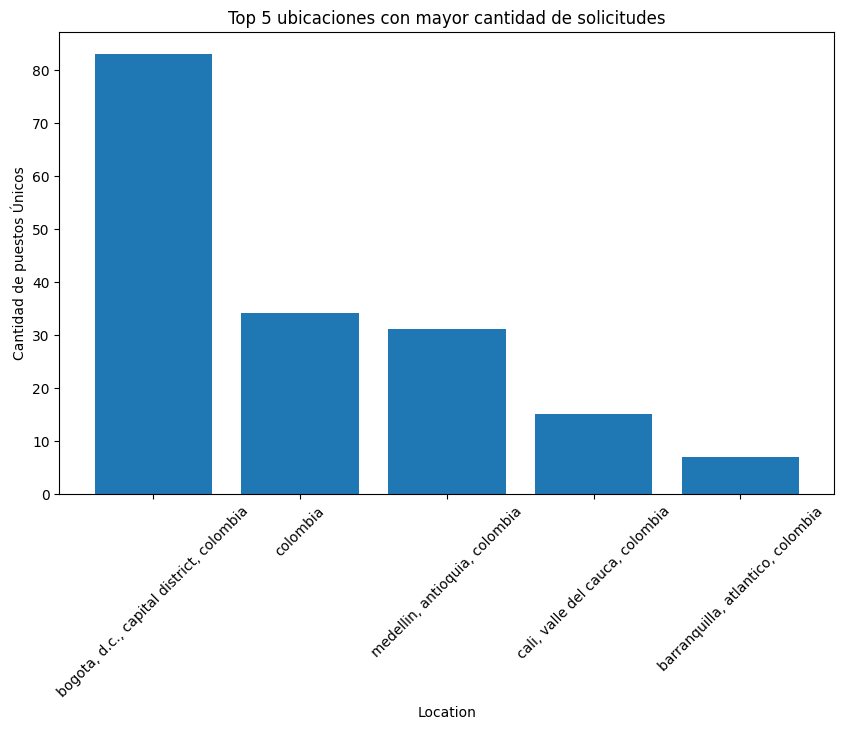

In [128]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_ubicacion['Location'], top_5_ubicacion['Title'])
plt.xlabel('Location')
plt.ylabel('Cantidad de puestos Únicos')
plt.title('Top 5 ubicaciones con mayor cantidad de solicitudes')
plt.xticks(rotation=45)
plt.show()

- Agrupar por empresas

In [129]:
df_por_empresas = df.groupby('Company')['Title'].nunique().reset_index()
#df_por_empresas_computrabajo = df_computrabajo.groupby('Location')['Company'].nunique().reset_index()
#df_por_empresas_jobz = df_jobz.groupby('Location')['Company'].nunique().reset_index()

In [130]:
print(df_por_empresas)

                               Company  Title
0                          abcw global      1
1                   accenture colombia      1
2                   acierta headhunter      2
3                             ada s.a.      7
4                          agaval s.a.      1
..                                 ...    ...
93   unir - la universidad en internet      2
94                              velaio      1
95  wfm informatica y tecnologia s.a.s      1
96    wfm informatica y tecnologia sas      1
97                world food programme      1

[98 rows x 2 columns]


In [131]:
top_5_empresas = df_por_empresas.sort_values('Title', ascending=False).head(5)

In [132]:
print(top_5_empresas)

                                           Company  Title
13                                     bancolombia     25
86                          tecnologia informatica     11
33                                   e-global s.a.     11
3                                         ada s.a.      7
24  colombiana de comercio / corbeta / alkosto s.a      6


- Presentación

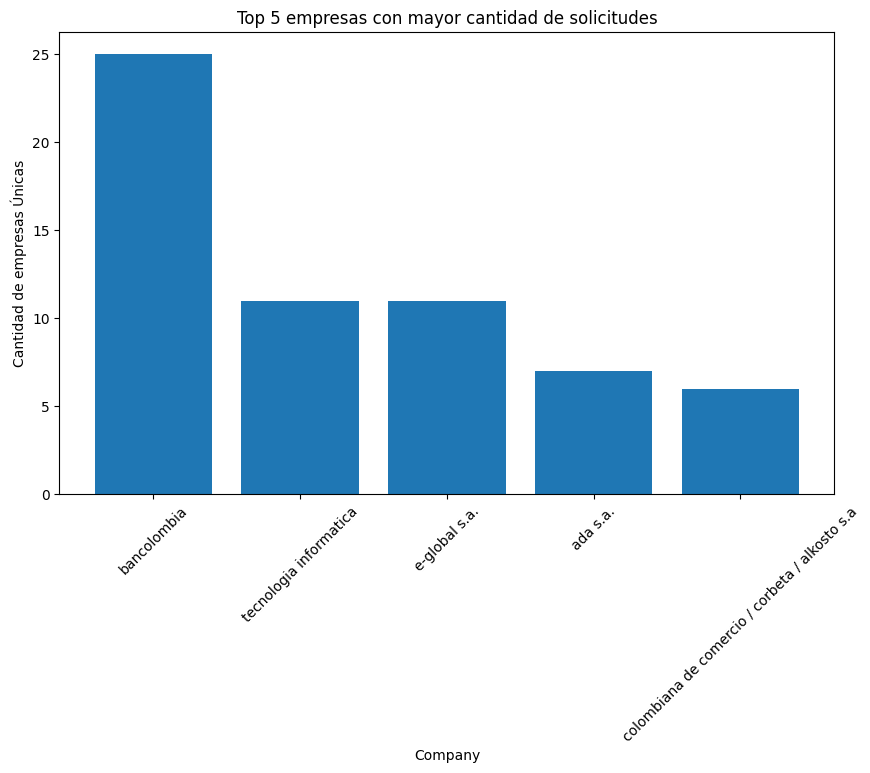

In [133]:
# Grafico de barras de las 5 empresas más demandantes
plt.figure(figsize=(10, 6))
plt.bar(top_5_empresas['Company'], top_5_empresas['Title'])
plt.xlabel('Company')
plt.ylabel('Cantidad de empresas Únicas')
plt.title('Top 5 empresas con mayor cantidad de solicitudes')
plt.xticks(rotation=45)
plt.show()

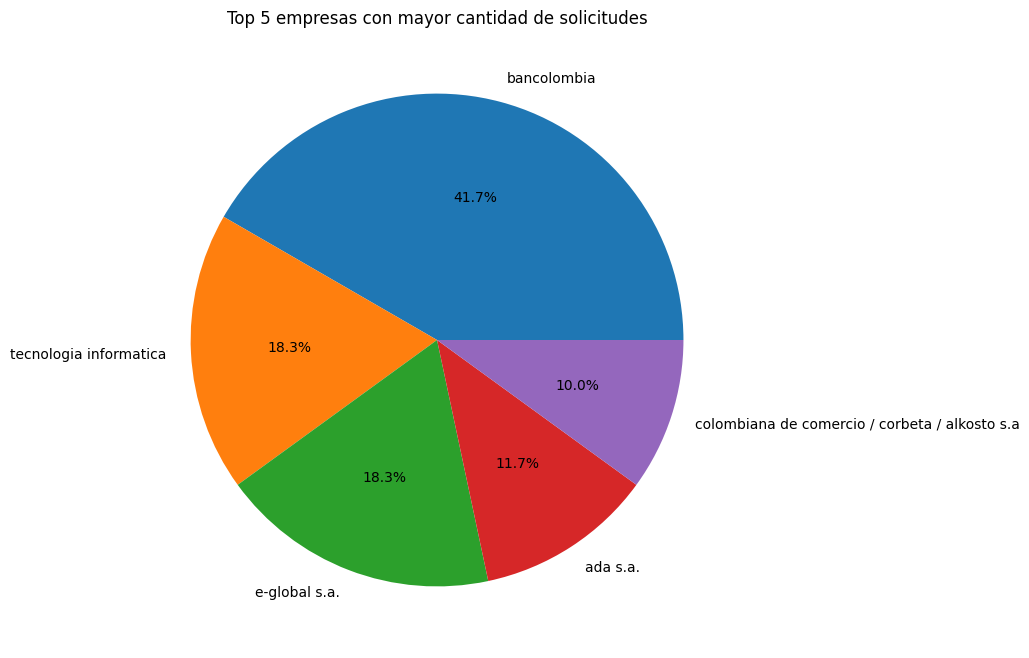

In [134]:
# Grafico de pastel:
plt.figure(figsize=(8, 8))
plt.pie(top_5_empresas['Title'], labels=top_5_empresas['Company'], autopct='%1.1f%%')
plt.title('Top 5 empresas con mayor cantidad de solicitudes')
plt.show()

- Mapa

In [135]:
# Inicializa el objeto geocoder de Google Maps
geolocator = GoogleV3(api_key=Keys.google_api_key)

def obtener_latitud(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return location.latitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ciudad}: {str(e)}")
        return None, None
    
def obtener_longitud(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ciudad}: {str(e)}")
        return None, None

In [136]:
top_5_ubicacion['Latitud'] = top_5_ubicacion['Location'].apply(obtener_latitud)
top_5_ubicacion['Longitud'] = top_5_ubicacion['Location'].apply(obtener_longitud)

In [137]:
top_5_ubicacion

,Location,Title,Latitud,Longitud
4,"bogota, d.c., capital district, colombia",83,4.710989,-74.072092
10,colombia,34,4.570868,-74.297333
22,"medellin, antioquia, colombia",31,6.247638,-75.565815
6,"cali, valle del cauca, colombia",15,3.451647,-76.531985
2,"barranquilla, atlantico, colombia",7,11.004107,-74.806981


In [138]:
#Se crea un mapa centrado en la capital
mapa = folium.Map(location=[4.710989, -74.072092], zoom_start=5.5)

# Resaltar las 5 ciudades principales en el mapa
for _, row in top_5_ubicacion.iterrows():
    ciudad = row['Location']
    latitud = row['Latitud']
    longitud = row['Longitud']
    folium.Marker(
        location=[latitud, longitud],
        popup=ciudad,
        icon=folium.Icon(icon='home', color='black')
    ).add_to(mapa)

mapa

In [139]:
df['Latitud'] = df['Location'].apply(obtener_latitud)
df['Longitud'] = df['Location'].apply(obtener_longitud)

In [140]:
#Se crea un mapa centrado en la capital
mapa = folium.Map(location=[4.710989, -74.072092], zoom_start=5.5)

# Resaltar las 5 ciudades principales en el mapa
for _, row in df.iterrows():
    ciudad = row['Location']
    latitud = row['Latitud']
    longitud = row['Longitud']
    folium.Marker(
        location=[latitud, longitud],
        popup=ciudad,
        icon=folium.Icon(icon='home', color='black')
    ).add_to(mapa)

mapa

In [141]:
df

,Title,Location,Company,Latitud,Longitud
0,aprendiz universitario en ingenieria de softwa...,colombia,bancolombia,4.570868,-74.297333
1,aprendiz universitario en ingenieria de sistem...,colombia,bancolombia,4.570868,-74.297333
2,aprendiz universitario en ingenieria de sistem...,colombia,bancolombia,4.570868,-74.297333
3,aprendiz universitario en ingenieria de sistem...,colombia,bancolombia,4.570868,-74.297333
4,aprendiz universitario en ingenieria de sistem...,colombia,bancolombia,4.570868,-74.297333
...,...,...,...,...,...
1320,jefe de ti,"la estrella, antioquia, colombia",milagros enterprise group s.a.s,6.151145,-75.636623
1321,analista seguridad ti (monitoreo),"medellin, antioquia, colombia",postobon s.a.,6.247638,-75.565815
1322,analista contable,"bogota, d.c., capital district, colombia",tecnologia informatica,4.710989,-74.072092
1323,docente de redes e informatica,"bogota, d.c., capital district, colombia",educacion futuro,4.710989,-74.072092


### Categorias

In [142]:
#Se lee el df generado a partir del analisis del WebScraping, se toman de este solo los titulos y se conserva el formato Dataframe
df_Titles = df["Title"].to_frame()

In [143]:
# assigning API KEY to initialize openai environment
openai.api_key = Keys.openai_api_key

In [147]:
response = openai.ChatCompletion.create(
  model="gpt-4-0613",
  messages=[
        {"role": "system", "content": "Hello"},
       {"role": "user", "content": f"""
        Te proporcionaré un dataframe {df_Titles}, el cual contiene titulos de trabajos obtenidos mediante un proceso de WebScraping y un dataframe {df_Categorias} con unas categorias potenciales basadas en los títulos de los trabajos obtenidos; tu trabajo será el de generar un JSON con clave (la categoria) y el valor deberá corresponder a la cantidad de titulos identificados y clasificados por ti para cada una de las categorias. solo responde con el JSON, NADA MAS."""}
    ]
)

#print(response['choices'][0]['message']['content'])

{
  "aprendiz universitario": 5,
  "ingenieria de sistemas": 200,
  "analista de procesos": 50,
  "seguridad ti": 30,
  "desarrollo java": 45,
  "analista de bases de datos": 70,
  "microsoft dynamics crm": 25,
  "profesional tic recien egresado": 15,
  "ingeniero de software": 100,
  "desarrollador frontend": 80,
  "desarrollador backend": 90,
  "desarrollador full-stack": 120,
  "analista de aseguramiento de calidad (qa)": 55,
  "ingeniero devops": 60,
  "cientifico de datos": 42,
  "ingeniero de nube": 37,
  "desarrollador de aplicaciones moviles": 78,
  "ingeniero de ciberseguridad": 33,
  "otro": 135
}


### Descarga del dataframe final

In [145]:
df.to_csv("./Resultados/df_final.csv", index=False, mode="w")